__*Attribute Information:*__
- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

__*class:*__
- class_0
- class_1
- class_2

This is a copy of UCI ML Wine recognition datasets. https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

__*Original Owners:*__

Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.

__*Citation:*__

Lichman, M. (2013). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

__*References*__

(1) S. Aeberhard, D. Coomans and O. de Vel, Comparison of Classifiers in High Dimensional Settings, Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of Mathematics and Statistics, James Cook University of North Queensland. (Also submitted to Technometrics).

The data was used with many others for comparing various classifiers. The classes are separable, though only RDA has achieved 100% correct classification. (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data)) (All results using the leave-one-out technique)

(2) S. Aeberhard, D. Coomans and O. de Vel, “THE CLASSIFICATION PERFORMANCE OF RDA” Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of Mathematics and Statistics, James Cook University of North Queensland. (Also submitted to Journal of Chemometrics).

In [ ]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

# Step 0. Data preparation

In [ ]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()
wine.data.shape

(178, 13)

In [ ]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data[:, :2],
    wine.target,
    test_size=0.3,
    shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Step 1. Preparing a neural network model

## Step 1.1. Model architecture

In [ ]:
class WineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(WineNet, self).__init__()

        self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid() # n_hidden_neurons
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = torch.nn.Sigmoid() # n_hidden_neurons
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        return x # return scores

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x # return probability

wine_net = WineNet(5)

## Step 1.2. Loss function

In [ ]:
loss = torch.nn.CrossEntropyLoss()


## Step 1.3. Optimizer

In [ ]:
optimizer = torch.optim.Adam(wine_net.parameters(), lr=0.001)

# Step 2. Training loop

In [ ]:
np.random.permutation(5)

array([2, 0, 1, 4, 3])

In [ ]:
batch_size = 10

for epoch in range(5000):
    order = np.random.permutation(len(X_train)) # schedule of batches
    for start_index in range(0, len(X_train), batch_size):
      optimizer.zero_grad()
      batch_indexes = order[start_index: start_index + batch_size]
      x_batch = X_train[batch_indexes]
      y_batch = y_train[batch_indexes]

      pred = wine_net.forward(x_batch)
      loss_value = loss(pred, y_batch)
      loss_value.backward()

      optimizer.step()


    if epoch % 100 == 0:
      test_preds = wine_net.forward(X_test)
      test_preds = test_preds.argmax(dim=1)
      print((test_preds == y_test).float().mean())


tensor(0.8333)
tensor(0.8148)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8704)
tensor(0.8519)
tensor(0.8704)
tensor(0.8704)
tensor(0.8704)
tensor(0.8889)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8704)
tensor(0.8333)
tensor(0.8519)
tensor(0.8519)
tensor(0.8889)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8519)
tensor(0.8519)
tensor(0.8704)
tensor(0.8148)
tensor(0.8704)
tensor(0.8519)
tensor(0.8704)
tensor(0.8519)
tensor(0.8704)
tensor(0.8704)
tensor(0.8704)
tensor(0.8519)
tensor(0.8704)
tensor(0.8519)
tensor(0.8519)
tensor(0.8704)
tensor(0.8704)


# Step 3. Visualization of dividing surfaces.

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
<ipython-input-18-4ffbf2cfa672>:25: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  plt.scatter(X_train[indexes, 0],
<ipython-input-18-4ffbf2cfa672>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[indexes, 0],


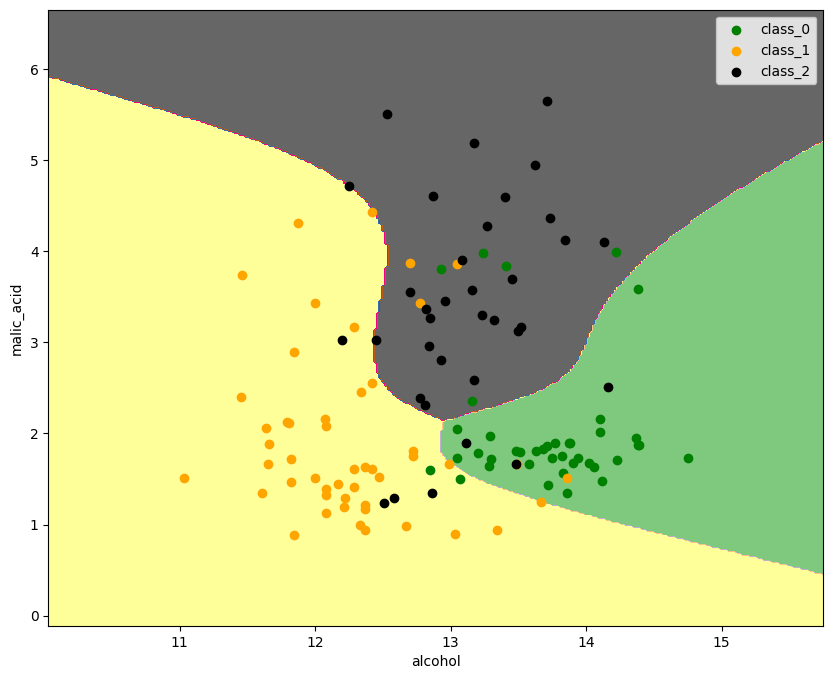

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy =  torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                         torch.arange(y_min, y_max, plot_step))

preds = wine_net.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(y_train == i)
    plt.scatter(X_train[indexes, 0],
                X_train[indexes, 1],
                c=color,
                label=wine.target_names[i],
                cmap='Accent')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.legend()

# Step 4. Homework (60 points)

Let's practice with WineNet. Modify the architecture so that all 13 features are accepted as input and perform the following experiments:

1. Experiment with the number of neurons in the hidden layers. Try putting a very small number. Is there a threshold value for the number of hidden neurons at which learning becomes impossible?

2. Try passing different test_size values to the train_test_split function. At what value of test_size does the network predict worse than Base Rate*? And what is the Base Rate of the wine dataset?

3. Does the training time per epoch depend on the batch size? Explore this relationship.

As a report attach code and graphs that show all the necessary dependencies.

In [44]:
import torch
import random
import numpy as np

import matplotlib.pyplot as plt

import sklearn.datasets
from sklearn.model_selection import train_test_split

from datetime import datetime

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

wine = sklearn.datasets.load_wine()

In [40]:
len(wine.target)

178

In [45]:
def run_wine_net_with_parameters(hidden_neurons = 10, test_size = 0.3, batch_size = 10):
  X_train, X_test, y_train, y_test = train_test_split(
      wine.data[:, :13],
      wine.target,
      test_size=test_size,
      shuffle=True)

  X_train = torch.FloatTensor(X_train)
  X_test = torch.FloatTensor(X_test)
  y_train = torch.LongTensor(y_train)
  y_test = torch.LongTensor(y_test)

  class WineNet(torch.nn.Module):
      def __init__(self, n_hidden_neurons):
          super(WineNet, self).__init__()
          self.fc1 = torch.nn.Linear(13, n_hidden_neurons)
          self.ac1 = torch.nn.Sigmoid()
          self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
          self.ac2 = torch.nn.Sigmoid()
          self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
          self.sm = torch.nn.Softmax(dim=1)

      def forward(self, x):
          x = self.fc1(x)
          x = self.ac1(x)
          x = self.fc2(x)
          x = self.ac2(x)
          x = self.fc3(x)
          return x

      def inference(self, x):
          x = self.forward(x)
          x = self.sm(x)
          return x

  wine_net = WineNet(hidden_neurons)
  loss = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(wine_net.parameters(), lr=0.001)

  test_accuracy_history = []
  test_loss_history = []

  start_time = datetime.now()
  for epoch in range(5000):
      order = np.random.permutation(len(X_train)) # schedule of batches
      for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        batch_indexes = order[start_index: start_index + batch_size]
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]

        pred = wine_net.forward(x_batch)
        loss_value = loss(pred, y_batch)
        loss_value.backward()

        optimizer.step()


      if epoch % 100 == 0:
        test_preds = wine_net.forward(X_test)

        loss_value = loss(test_preds, y_test)
        test_loss_history.append(loss_value.to('cpu').detach().numpy())

        accuracy_value = (test_preds.argmax(dim=1) == y_test).float().mean() # if i-th element is equal to
        test_accuracy_history.append(accuracy_value.to('cpu'))
        print(accuracy_value)

  end_time = datetime.now()

  return test_loss_history, test_accuracy_history, end_time - start_time

**1. Experiment with the number of neurons in the hidden layers. Try putting a very small number. Is there a threshold value for the number of hidden neurons at which learning becomes impossible?**

**Answer:** The less neurons, 1) the slower learning process; 2) the more chances that our learning can get stuck in the same level lines with the same error (You can see that in nets with 5, 2, 1 hidden neurons). So, we see from the samples 2 and 1 are in most cases will got stuck, sometimes with even more  (f.e.:5) as well. The second time with 5 hidden neurons was able to proceed much better (that's why it's about probability).




In [ ]:
loss_history_10, accuracy_history_10 = run_wine_net_with_parameters(hidden_neurons=10)

In [ ]:
loss_history_5, accuracy_history_5 = run_wine_net_with_parameters(hidden_neurons=5)

In [ ]:
loss_history_3, accuracy_history_3 = run_wine_net_with_parameters(hidden_neurons=3)

In [ ]:
loss_history_2, accuracy_history_2 = run_wine_net_with_parameters(hidden_neurons=2)

In [ ]:
loss_history_1, accuracy_history_1 = run_wine_net_with_parameters(hidden_neurons=1)

In [ ]:
loss_history_5_2, accuracy_history_5_2 = run_wine_net_with_parameters(hidden_neurons=5)

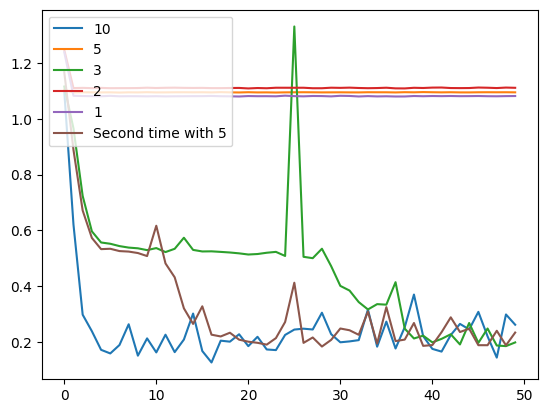

In [22]:
plt.plot(loss_history_10, label='10')
plt.plot(loss_history_5, label='5')
plt.plot(loss_history_3, label='3')
plt.plot(loss_history_2, label='2')
plt.plot(loss_history_1, label='1')
plt.plot(loss_history_5_2, label='Second time with 5')
plt.legend(loc='upper left')

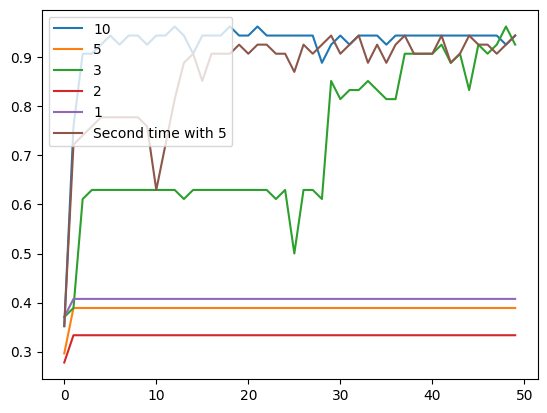

In [24]:
plt.plot(accuracy_history_10, label='10')
plt.plot(accuracy_history_5, label='5')
plt.plot(accuracy_history_3, label='3')
plt.plot(accuracy_history_2, label='2')
plt.plot(accuracy_history_1, label='1')
plt.plot(accuracy_history_5_2, label='Second time with 5')
plt.legend(loc='upper left')

**2. Try passing different test_size values to the train_test_split function. At what value of test_size does the network predict worse than Base Rate*? And what is the Base Rate of the wine dataset?**

**Answer:** With more than 0.5, it is hard for net to learn. With less than 0.3 it's not enough to test it properly. According to tests below, the network predict worse with 0.2 and 0.7 test sizes. I believe the Best Test Rate is 0.3 (it's canonical test size) and it perfectly works with Wine Net.

In [ ]:
loss_history_09, accuracy_history_09 = run_wine_net_with_parameters(test_size=0.9)

In [ ]:
loss_history_07, accuracy_history_07 = run_wine_net_with_parameters(test_size=0.7)

In [ ]:
loss_history_05, accuracy_history_05 = run_wine_net_with_parameters(test_size=0.5)

In [ ]:
loss_history_03, accuracy_history_03 = run_wine_net_with_parameters(test_size=0.3)

In [ ]:
loss_history_02, accuracy_history_02 = run_wine_net_with_parameters(test_size=0.2)

In [ ]:
loss_history_01, accuracy_history_01 = run_wine_net_with_parameters(test_size=0.1)

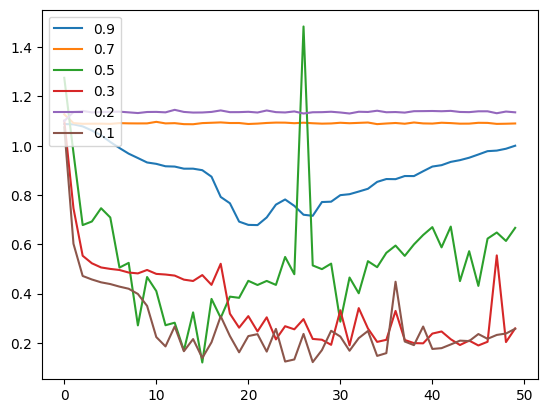

In [32]:
plt.plot(loss_history_09, label='0.9')
plt.plot(loss_history_07, label='0.7')
plt.plot(loss_history_05, label='0.5')
plt.plot(loss_history_03, label='0.3')
plt.plot(loss_history_02, label='0.2')
plt.plot(loss_history_01, label='0.1')
plt.legend(loc='upper left')

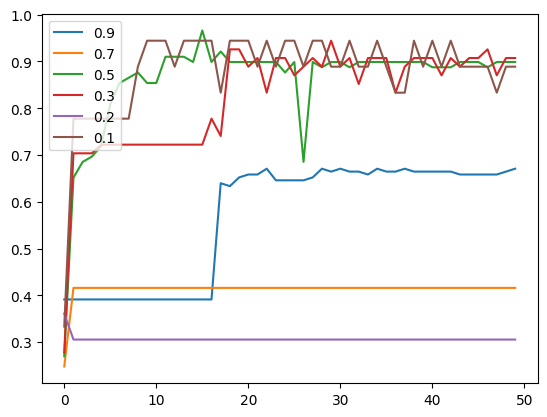

In [33]:
plt.plot(accuracy_history_09, label='0.9')
plt.plot(accuracy_history_07, label='0.7')
plt.plot(accuracy_history_05, label='0.5')
plt.plot(accuracy_history_03, label='0.3')
plt.plot(accuracy_history_02, label='0.2')
plt.plot(accuracy_history_01, label='0.1')
plt.legend(loc='upper left')

**3. Does the training time per epoch depend on the batch size? Explore this relationship.**

**Answer:** According to tests, the greater the batch size, the less time is needed to learn.

In [ ]:
loss_history_100, accuracy_history_100, time_100 = run_wine_net_with_parameters(batch_size=100)

In [ ]:
loss_history_50, accuracy_history_50, time_50 = run_wine_net_with_parameters(batch_size=50)

In [ ]:
loss_history_30, accuracy_history_30, time_30 = run_wine_net_with_parameters(batch_size=30)

In [ ]:
loss_history_10, accuracy_history_10, time_10 = run_wine_net_with_parameters(batch_size=10)

In [ ]:
loss_history_5, accuracy_history_5, time_5 = run_wine_net_with_parameters(batch_size=5)

In [52]:
time_100, time_50, time_30, time_10, time_5

(datetime.timedelta(seconds=13, microseconds=3039),
 datetime.timedelta(seconds=18, microseconds=579180),
 datetime.timedelta(seconds=30, microseconds=537118),
 datetime.timedelta(seconds=78, microseconds=370100),
 datetime.timedelta(seconds=145, microseconds=546806))